# Multivariate Optimization - Unconstrained
- **Purpose**: Minimize functions of multiple variables f(x₁, x₂, ..., xₙ)
- **scipy.optimize.minimize()**: Main function for multivariate optimization
- **Methods**: BFGS, L-BFGS-B, Nelder-Mead, CG, Newton-CG

Key concepts:
- **Gradient**: ∇f = [∂f/∂x₁, ∂f/∂x₂, ...] (direction of steepest ascent)
- **Hessian**: Matrix of second derivatives
- **Quasi-Newton**: Approximate Hessian (BFGS, L-BFGS)
- **Line search**: Find step size along direction

Real applications:
- **Machine Learning**: Training models, loss minimization
- **Neural Networks**: Backpropagation optimization
- **Portfolio optimization**: Asset allocation
- **Parameter estimation**: Curve fitting, regression
- **Physics**: Energy minimization, equilibrium

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Multivariate optimization module loaded")

Multivariate optimization module loaded


## Basic Example: 2D Paraboloid

**Function**: \( f(x, y) = (x-3)^2 + (y+1)^2 \)

**Analytical minimum**: (x*, y*) = (3, -1), f = 0

**optimize.minimize()** syntax:
```python
result = optimize.minimize(f, x0, method='BFGS')
```

Where:
- `f`: Objective function f(x) where x is array
- `x0`: Initial guess [x0, y0]
- `method`: Optimization algorithm

Minimize f(x,y) = (x-3)² + (y+1)²

Optimization result:
  Minimum at: x = [ 3. -1.]
  Minimum value: f = 0.000000
  Function evaluations: 9
  Success: True

Analytical solution: (3, -1)
Error: 8.39e-08


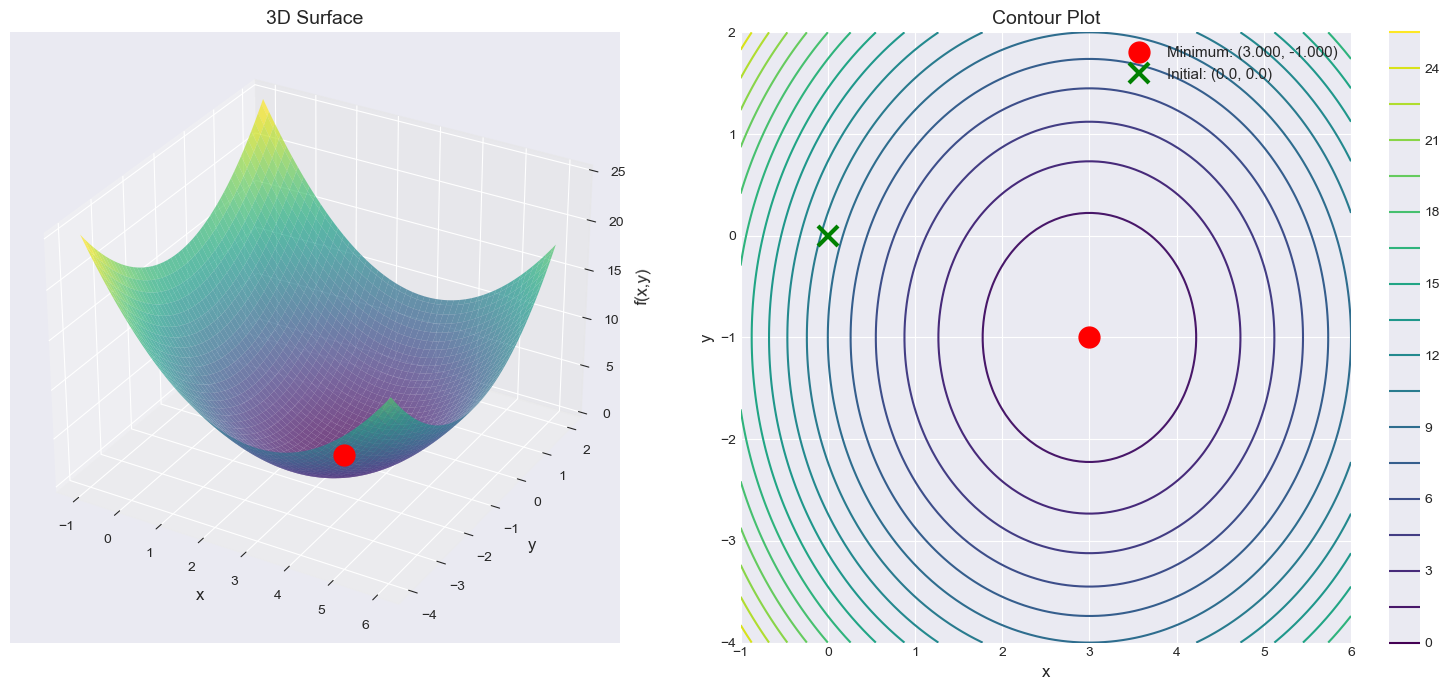


BFGS successfully found the minimum!


In [2]:
# Define objective function
def f(x):
    return (x[0] - 3)**2 + (x[1] + 1)**2

# Initial guess
x0 = np.array([0.0, 0.0])

# Optimize
result = optimize.minimize(f, x0, method='BFGS')

print("Minimize f(x,y) = (x-3)² + (y+1)²")
print("\nOptimization result:")
print(f"  Minimum at: x = {result.x}")
print(f"  Minimum value: f = {result.fun:.6f}")
print(f"  Function evaluations: {result.nfev}")
print(f"  Success: {result.success}")
print(f"\nAnalytical solution: (3, -1)")
print(f"Error: {np.linalg.norm(result.x - np.array([3, -1])):.2e}")

# Visualize
x = np.linspace(-1, 6, 100)
y = np.linspace(-4, 2, 100)
X, Y = np.meshgrid(x, y)
Z = (X - 3)**2 + (Y + 1)**2

fig = plt.figure(figsize=(16, 7))

# 3D surface
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax1.plot([result.x[0]], [result.x[1]], [result.fun], 'ro', markersize=15,
         label='Minimum')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_zlabel('f(x,y)', fontsize=12)
ax1.set_title('3D Surface', fontsize=14)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.plot(result.x[0], result.x[1], 'ro', markersize=15, 
         label=f'Minimum: ({result.x[0]:.3f}, {result.x[1]:.3f})')
ax2.plot(x0[0], x0[1], 'gx', markersize=15, markeredgewidth=3,
         label=f'Initial: ({x0[0]}, {x0[1]})')
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('Contour Plot', fontsize=14)
ax2.legend(fontsize=11)
plt.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()

print("\nBFGS successfully found the minimum!")

## Providing Gradient (Jacobian)

**Why provide gradient?**
- Faster convergence (fewer iterations)
- More accurate optimization
- Some methods require it

**Gradient**: \( \nabla f = \begin{bmatrix} \partial f/\partial x_1 \\ \partial f/\partial x_2 \\ \vdots \end{bmatrix} \)

**Syntax**:
```python
def gradient(x):
    return np.array([df_dx1, df_dx2, ...])

result = optimize.minimize(f, x0, jac=gradient, method='BFGS')
```

**Auto-differentiation**: Use `jac='2-point'` or `'3-point'` for numerical gradient

Rosenbrock Function: (1-x)² + 100(y-x²)²
Known minimum: (1, 1), f = 0

WITHOUT gradient (numerical derivatives):
  Minimum: [1. 1.]
  f(x): 0.00000000
  Function evaluations: 72
  Iterations: 19

WITH analytical gradient:
  Minimum: [1. 1.]
  f(x): 0.00000000
  Function evaluations: 24
  Iterations: 19

Improvement: 3.0x fewer evaluations!


/var/folders/d1/sfvddbbx4tg14yxq7trqmhyw0000gn/T/ipykernel_12479/2307582924.py:57: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d1/sfvddbbx4tg14yxq7trqmhyw0000gn/T/ipykernel_12479/2307582924.py:57: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


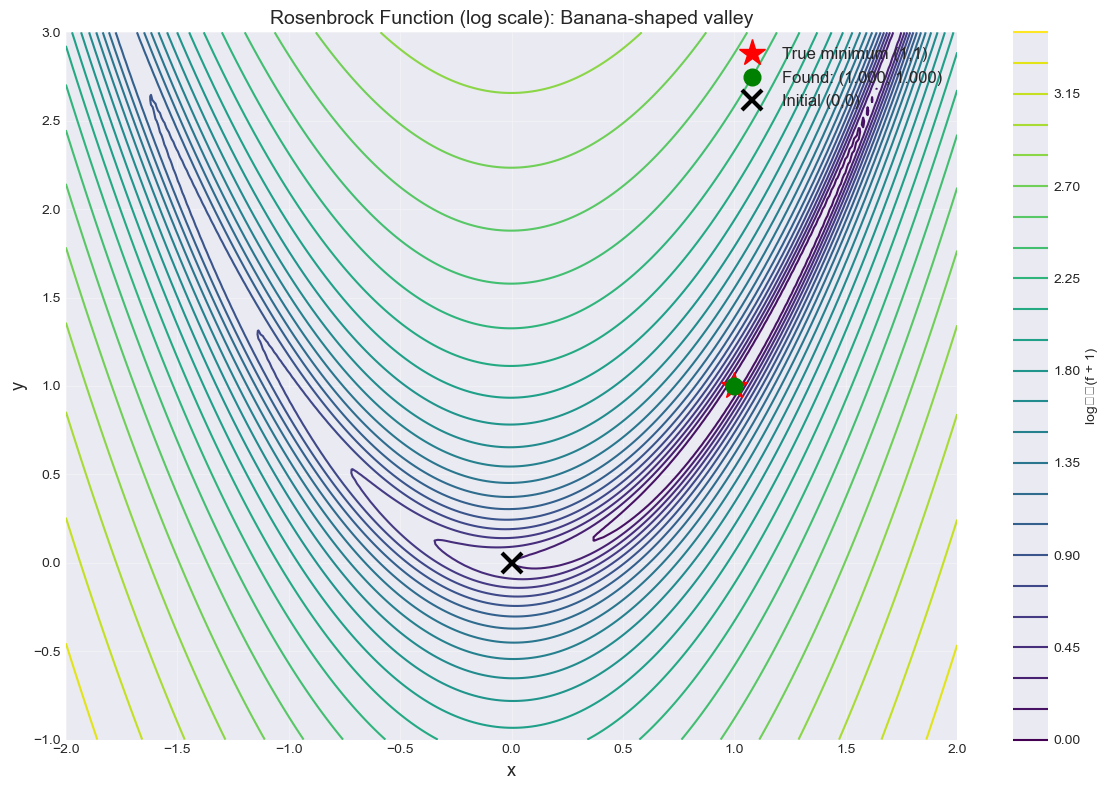


Providing gradient significantly improves performance!


In [3]:
# Rosenbrock function: classic test case
def rosenbrock(x):
    """f(x,y) = (1-x)² + 100(y-x²)²"""
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

def rosenbrock_grad(x):
    """Analytical gradient"""
    df_dx = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
    df_dy = 200*(x[1] - x[0]**2)
    return np.array([df_dx, df_dy])

x0 = np.array([0.0, 0.0])

print("Rosenbrock Function: (1-x)² + 100(y-x²)²")
print("Known minimum: (1, 1), f = 0\n")

# Case 1: Without gradient (numerical)
result1 = optimize.minimize(rosenbrock, x0, method='BFGS')

# Case 2: With analytical gradient
result2 = optimize.minimize(rosenbrock, x0, jac=rosenbrock_grad, method='BFGS')

print("WITHOUT gradient (numerical derivatives):")
print(f"  Minimum: {result1.x}")
print(f"  f(x): {result1.fun:.8f}")
print(f"  Function evaluations: {result1.nfev}")
print(f"  Iterations: {result1.nit}")

print("\nWITH analytical gradient:")
print(f"  Minimum: {result2.x}")
print(f"  f(x): {result2.fun:.8f}")
print(f"  Function evaluations: {result2.nfev}")
print(f"  Iterations: {result2.nit}")

print(f"\nImprovement: {result1.nfev/result2.nfev:.1f}x fewer evaluations!")

# Visualize Rosenbrock (banana-shaped valley)
x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 3, 200)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100*(Y - X**2)**2

plt.figure(figsize=(12, 8))
# Use log scale for better visualization
contour = plt.contour(X, Y, np.log10(Z + 1), levels=30, cmap='viridis')
plt.plot(1, 1, 'r*', markersize=20, label='True minimum (1,1)')
plt.plot(result2.x[0], result2.x[1], 'go', markersize=12, 
         label=f'Found: ({result2.x[0]:.3f}, {result2.x[1]:.3f})')
plt.plot(x0[0], x0[1], 'kx', markersize=15, markeredgewidth=3,
         label='Initial (0,0)')
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Rosenbrock Function (log scale): Banana-shaped valley', fontsize=14)
plt.legend(fontsize=12)
plt.colorbar(contour, label='log₁₀(f + 1)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nProviding gradient significantly improves performance!")

## Real Example: Linear Regression

**Problem**: Fit line y = mx + b to minimize squared error

**Loss function**: \( L(m, b) = \frac{1}{n}\sum_{i=1}^{n}(y_i - mx_i - b)^2 \)

**Gradient**:
\[ \frac{\partial L}{\partial m} = -\frac{2}{n}\sum x_i(y_i - mx_i - b) \]
\[ \frac{\partial L}{\partial b} = -\frac{2}{n}\sum (y_i - mx_i - b) \]

**Goal**: Find optimal parameters [m, b]

Linear Regression via Optimization
  Data: 50 points with noise
  Model: y = mx + b
  Loss: Mean Squared Error

True parameters:
  m = 2.5, b = 1.0

Optimized parameters:
  m = 2.3840
  b = 1.1289
  MSE = 3.3006
  Iterations: 5

NumPy polyfit (analytical):
  m = 2.3840, b = 1.1289
  Match: True


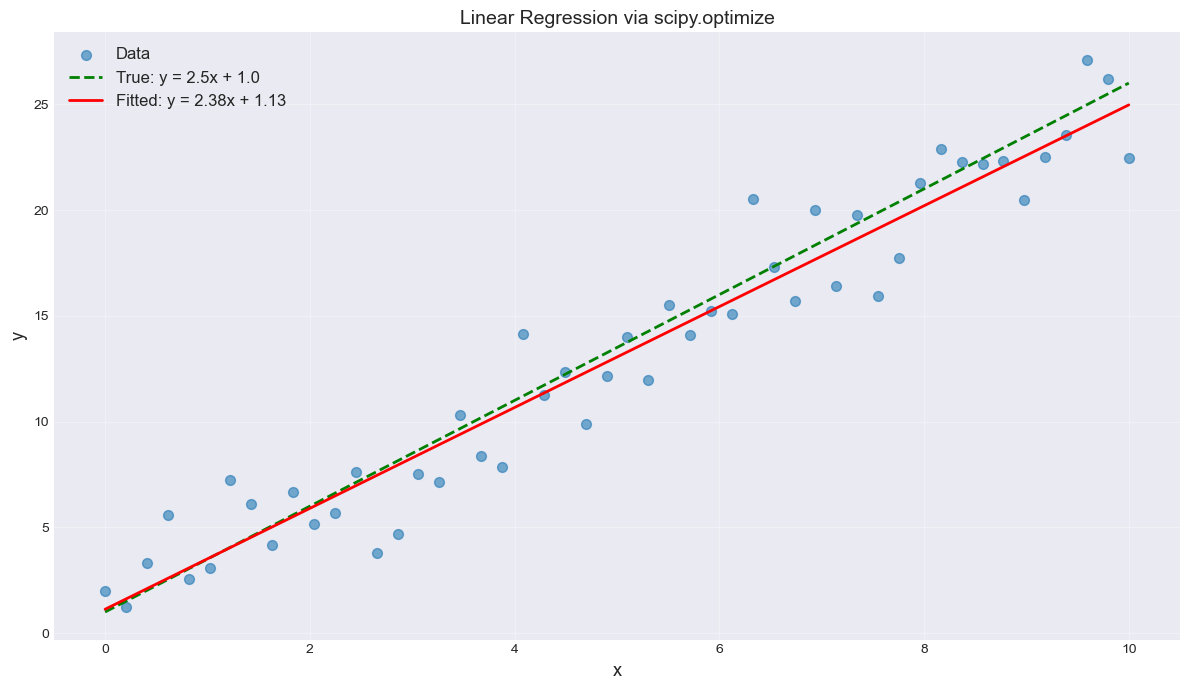


Optimization matches analytical solution!


In [4]:
# Generate synthetic data
np.random.seed(42)
n = 50
x_data = np.linspace(0, 10, n)
true_m, true_b = 2.5, 1.0
y_data = true_m * x_data + true_b + np.random.randn(n) * 2  # Add noise

# Mean Squared Error loss
def mse_loss(params):
    m, b = params
    predictions = m * x_data + b
    return np.mean((y_data - predictions)**2)

# Gradient
def mse_gradient(params):
    m, b = params
    predictions = m * x_data + b
    errors = y_data - predictions
    dm = -2 * np.mean(x_data * errors)
    db = -2 * np.mean(errors)
    return np.array([dm, db])

# Initial guess
params0 = np.array([0.0, 0.0])

# Optimize
result = optimize.minimize(mse_loss, params0, jac=mse_gradient, method='BFGS')

m_opt, b_opt = result.x
mse_opt = result.fun

print("Linear Regression via Optimization")
print(f"  Data: {n} points with noise")
print(f"  Model: y = mx + b")
print(f"  Loss: Mean Squared Error\n")

print("True parameters:")
print(f"  m = {true_m}, b = {true_b}")

print("\nOptimized parameters:")
print(f"  m = {m_opt:.4f}")
print(f"  b = {b_opt:.4f}")
print(f"  MSE = {mse_opt:.4f}")
print(f"  Iterations: {result.nit}")

# Compare with numpy's polyfit (analytical solution)
m_np, b_np = np.polyfit(x_data, y_data, 1)
print(f"\nNumPy polyfit (analytical):")
print(f"  m = {m_np:.4f}, b = {b_np:.4f}")
print(f"  Match: {np.allclose([m_opt, b_opt], [m_np, b_np])}")

# Visualize
plt.figure(figsize=(12, 7))
plt.scatter(x_data, y_data, alpha=0.6, s=50, label='Data')
x_line = np.linspace(0, 10, 100)
plt.plot(x_line, true_m*x_line + true_b, 'g--', linewidth=2, 
         label=f'True: y = {true_m}x + {true_b}')
plt.plot(x_line, m_opt*x_line + b_opt, 'r-', linewidth=2,
         label=f'Fitted: y = {m_opt:.2f}x + {b_opt:.2f}')
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Linear Regression via scipy.optimize', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nOptimization matches analytical solution!")

## Real Example: Logistic Regression (Classification)

**Problem**: Binary classification with logistic function

**Model**: \( \hat{y} = \sigma(w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}} \)

**Loss (Cross-entropy)**:
\[ L(w, b) = -\frac{1}{n}\sum [y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)] \]

**Goal**: Find optimal weights w and bias b

**Application**: Medical diagnosis, spam detection, credit scoring

Logistic Regression (Binary Classification)
  Data: 100 samples, 2 features
  Model: σ(w·x + b)
  Loss: Cross-entropy

True parameters:
  w = [ 2.  -1.5]
  b = 0.50

Optimized parameters:
  w = [ 8.5151 -5.6289]
  b = 2.2414
  Loss = 0.1461
  Accuracy = 93.0%
  Iterations: 20


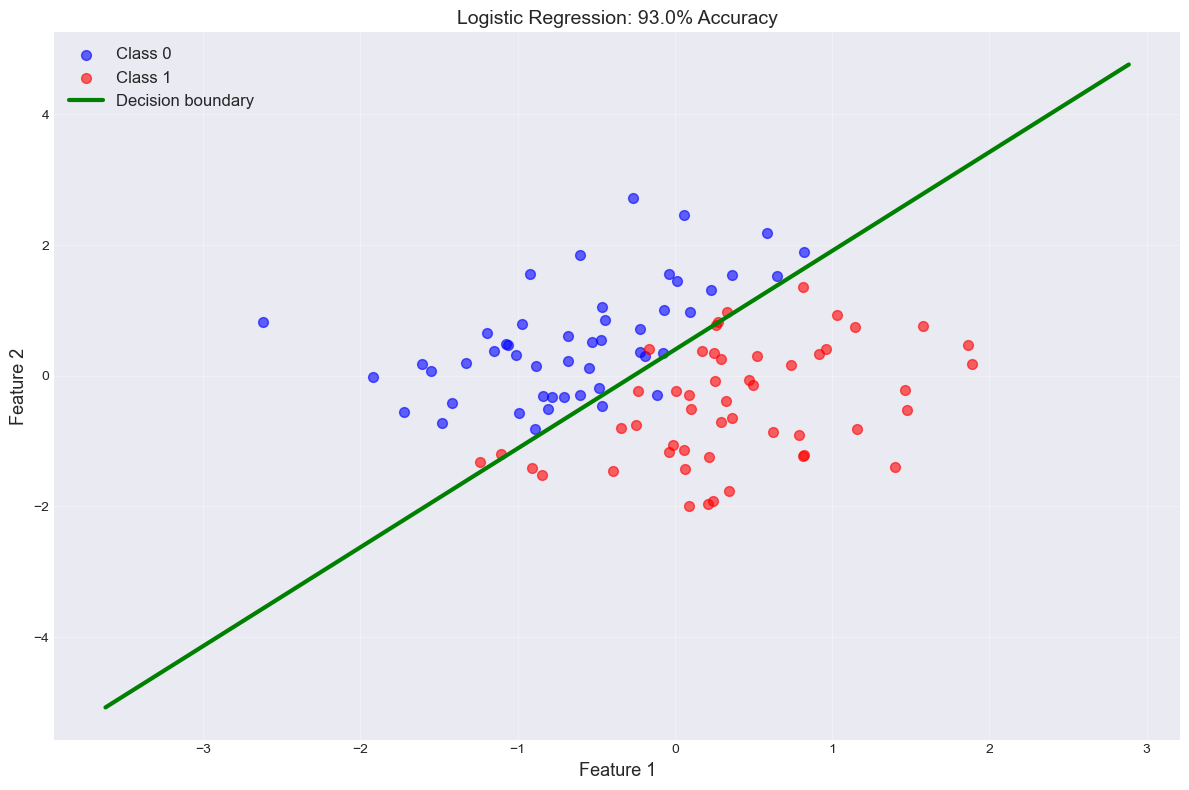


Successfully trained logistic regression classifier!


In [5]:
# Generate binary classification data
np.random.seed(42)
n = 100
X = np.random.randn(n, 2)  # 2 features
true_w = np.array([2.0, -1.5])
true_b = 0.5
y = (X @ true_w + true_b + np.random.randn(n)*0.5 > 0).astype(float)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip for numerical stability

# Cross-entropy loss
def cross_entropy_loss(params):
    w = params[:-1]
    b = params[-1]
    z = X @ w + b
    y_pred = sigmoid(z)
    # Add small epsilon to avoid log(0)
    epsilon = 1e-10
    loss = -np.mean(y * np.log(y_pred + epsilon) + 
                    (1 - y) * np.log(1 - y_pred + epsilon))
    return loss

# Gradient
def cross_entropy_gradient(params):
    w = params[:-1]
    b = params[-1]
    z = X @ w + b
    y_pred = sigmoid(z)
    error = y_pred - y
    dw = X.T @ error / n
    db = np.mean(error)
    return np.concatenate([dw, [db]])

# Initial guess
params0 = np.zeros(3)  # [w1, w2, b]

# Optimize
result = optimize.minimize(cross_entropy_loss, params0, 
                          jac=cross_entropy_gradient, method='BFGS')

w_opt = result.x[:-1]
b_opt = result.x[-1]

# Accuracy
y_pred = sigmoid(X @ w_opt + b_opt) > 0.5
accuracy = np.mean(y_pred == y) * 100

print("Logistic Regression (Binary Classification)")
print(f"  Data: {n} samples, 2 features")
print(f"  Model: σ(w·x + b)")
print(f"  Loss: Cross-entropy\n")

print("True parameters:")
print(f"  w = {true_w}")
print(f"  b = {true_b:.2f}")

print("\nOptimized parameters:")
print(f"  w = {w_opt}")
print(f"  b = {b_opt:.4f}")
print(f"  Loss = {result.fun:.4f}")
print(f"  Accuracy = {accuracy:.1f}%")
print(f"  Iterations: {result.nit}")

# Visualize decision boundary
plt.figure(figsize=(12, 8))
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', alpha=0.6, s=50, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', alpha=0.6, s=50, label='Class 1')

# Decision boundary: w1*x1 + w2*x2 + b = 0
x1_boundary = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
x2_boundary = -(w_opt[0]*x1_boundary + b_opt) / w_opt[1]
plt.plot(x1_boundary, x2_boundary, 'g-', linewidth=3, 
         label='Decision boundary')

plt.xlabel('Feature 1', fontsize=13)
plt.ylabel('Feature 2', fontsize=13)
plt.title(f'Logistic Regression: {accuracy:.1f}% Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nSuccessfully trained logistic regression classifier!")

## Methods Comparison

**scipy.optimize.minimize()** supports many methods:

| Method | Gradient | Hessian | Speed | Use When |
|--------|----------|---------|-------|----------|
| **BFGS** | Yes | Approx | Fast | General purpose, medium size |
| **L-BFGS-B** | Yes | Approx | Fast | Large scale, with bounds |
| **Newton-CG** | Yes | Yes | V. Fast | Hessian available |
| **CG** | Yes | No | Medium | No Hessian, large scale |
| **Nelder-Mead** | No | No | Slow | Noisy, non-smooth |
| **Powell** | No | No | Medium | Derivative-free |

**Recommendations**:
- **Default**: BFGS (balanced, reliable)
- **Large problems**: L-BFGS-B (memory efficient)
- **With bounds**: L-BFGS-B, TNC
- **No gradient**: Nelder-Mead, Powell
- **Fastest**: Newton-CG (if Hessian available)

In [6]:
# Compare methods on Rosenbrock
print("Method Comparison on Rosenbrock Function\n")
print(f"{'Method':<15} {'Min':<20} {'f(x)':<12} {'nfev':<8} {'nit':<6}")
print("="*70)

x0 = np.array([0.0, 0.0])
methods = ['BFGS', 'L-BFGS-B', 'CG', 'Nelder-Mead', 'Powell']

for method in methods:
    if method in ['BFGS', 'CG']:
        result = optimize.minimize(rosenbrock, x0, jac=rosenbrock_grad, method=method)
    else:
        result = optimize.minimize(rosenbrock, x0, method=method)
    
    x_str = f"({result.x[0]:.4f}, {result.x[1]:.4f})"
    print(f"{method:<15} {x_str:<20} {result.fun:<12.6f} {result.nfev:<8} {result.nit:<6}")

print("\nAll methods converge to (1, 1), but with different efficiency!")
print("BFGS/L-BFGS-B: Best balance of speed and accuracy")
print("Nelder-Mead: Slowest but needs no gradient")

Method Comparison on Rosenbrock Function

Method          Min                  f(x)         nfev     nit   
BFGS            (1.0000, 1.0000)     0.000000     24       19    
L-BFGS-B        (1.0000, 1.0000)     0.000000     78       21    
CG              (1.0000, 1.0000)     0.000000     42       18    
Nelder-Mead     (1.0000, 1.0000)     0.000000     146      79    
Powell          (1.0000, 1.0000)     0.000000     414      16    

All methods converge to (1, 1), but with different efficiency!
BFGS/L-BFGS-B: Best balance of speed and accuracy
Nelder-Mead: Slowest but needs no gradient


## Summary

### Key Function:

```python
result = optimize.minimize(
    fun=f,              # Objective function
    x0=x0,              # Initial guess
    method='BFGS',      # Optimization method
    jac=gradient,       # Gradient (optional but recommended)
    options={'maxiter': 1000}  # Algorithm options
)

# Access results
result.x        # Optimal point
result.fun      # Minimum value
result.success  # Convergence flag
result.nfev     # Function evaluations
```

### Best Practices:

✓ **Provide gradient** when possible (2-5x faster)  
✓ **BFGS** is best default choice  
✓ **L-BFGS-B** for large problems or with bounds  
✓ **Good initial guess** helps convergence  
✓ **Scale variables** to similar magnitude  

### Applications:

- **Machine Learning**: Train models (regression, classification)
- **Deep Learning**: Optimize network weights
- **Statistics**: Maximum likelihood estimation
- **Finance**: Portfolio optimization, risk management
- **Engineering**: Design optimization, control systems

### Common Issues:

⚠️ **Local minima**: May not find global minimum  
⚠️ **Poor scaling**: Normalize features  
⚠️ **Bad initial guess**: Try multiple starting points  
⚠️ **Numerical instability**: Check gradient correctness  

### Next:

- **Constrained optimization**: Add constraints g(x) ≤ 0
- **Global optimization**: Find global minimum
- **Specialized**: Trust region, SQP methods